# Light Velocity Measuring: Dan & Robert

# Introduction / Abstract

    Using our interests and Some sophisticated lab equipment, it is possible to calculate the speed of light by relating the change of position for a mirror to the change in time it takes light to travel to a stationary light sensing instrument.

# Procedure

    To start off the expariment we gathered up an oscilloscope (Agilent 54621A Oscilloscope, MegaZoom), one 30m survaying tape measure (Lufkin 100'/30m), A light velocity measuring instrument (Velocity of Light measurement Set 476 50), pair of triple mirrors, and 1 lens (f=200mm), with the prior three being mounted on weighted rod holders. The light velocity measuring instrument was placed on the ground with the face perpindicular to the 0 on the tape taped to the floor. The lens was placed at the 20 cm part of the tape in line with the tripple mirrors and light velocity measuring instrument. At each interval of half a meter we read the reading on the oscilloscope to measure the time continiously that it took for the light to travel to the triple mirrior and back. The conditions for this expairment were not ideal.

# Data

Note that the first element of our dx(m) and dt(ns) columns are 0 and 0. This is considering that we are at the base case of Distance = 0.5m and Time(x = 0.5m) = 492 ns

In [24]:
from astropy.io import ascii
data = ascii.read('Lab03_DR_Data.csv')
data

Distance(m),Time(ns),dx(m),dt(ns)
float64,int32,float64,int32
0.5,492,0.0,0
0.75,494,0.25,2
1.0,496,0.5,4
1.25,498,0.75,6
1.5,501,1.0,9
1.75,503,1.25,11
2.0,506,1.5,14
2.25,509,1.75,17
2.5,511,2.0,19


# Analysis / Calculations

After plotting out data collected and comparing the change in time vs change in distance travelled for light, we can see that there is a direct, or linear, relationship between the distance travelled by light and the time it takes the light to return to the sensor. 

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from scipy.optimize import curve_fit
from matplotlib import pyplot
%matplotlib inline

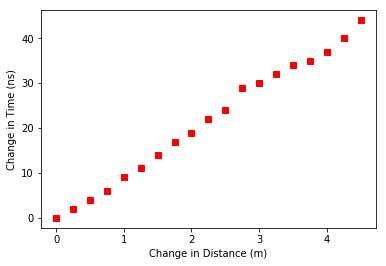

In [26]:
plt.plot(data['dx(m)'], data['dt(ns)'], 'rs')
plt.xlabel('Change in Distance (m)')
plt.ylabel('Change in Time (ns)')
plt.show()

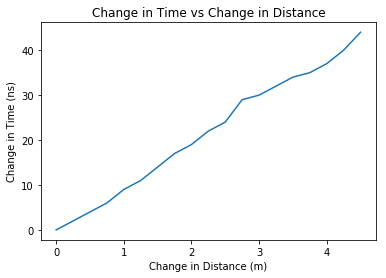

In [28]:
x = data['dx(m)']
y = data['dt(ns)']

pyplot.plot(x,y)
pyplot.title("Change in Time vs Change in Distance")
pyplot.xlabel("Change in Distance (m)")
pyplot.ylabel("Change in Time (ns)")
pyplot.show()

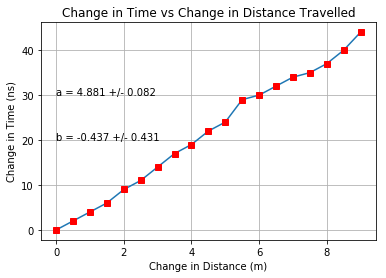

In [38]:
data = ascii.read('Lab03_DR_Data.csv')
x = data['dx(m)']*2
y = data['dt(ns)']

def func(x, a, b):
    return a*x + b

popt, pcov = curve_fit(func, x, y)


plt.plot(x, y, '-')
plt.text(0.5*10**-8, 30, r"a = {0:.3f} +/- {1:.3f}".format(popt[0], pcov[0,0]**0.5))
plt.text(0.5*10**-8, 20, r"b = {0:.3f} +/- {1:.3f}".format(popt[1], pcov[1,1]**0.5))
plt.grid()
plt.title('Change in Time vs Change in Distance Travelled')
plt.plot(x, y, 'rs')
plt.xlabel('Change in Distance (m)')
plt.ylabel('Change in Time (ns)')
plt.show()

# Conclusion

In our lab we got a value of 4.881 m/ns for c. This is in terms of nanoseconds(ns) so to convert to seconds we take 4.881 x 10^8. This value is 62.7% larger than the actual value of c which is roughly 3.0 x 10^8 m/s. This large error could come from not having the path of light travelling precisely from the laser in a straight direct line to the mirror and then back directly to the laser. There could have also been error in finding the exact times the light traveled for each varied distance. There could have also been interference from other sources of light or light reflectors impacting our sensor, thus throwing off values.